# Project 3: Ridge Regression

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [35]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Regularization strength
        self.theta_ = None   # Coefficients

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        y = np.array(y)
        
        n_samples, n_features = X.shape

        # Augment X with a column of ones for the intercept term
        X_augmented = np.c_[np.ones((n_samples, 1)), X]

        # Compute the Ridge Regression closed-form solution
        identity_matrix = np.eye(n_features + 1)
        self.theta_ = np.linalg.inv(X_augmented.T.dot(X_augmented) + self.alpha * identity_matrix).dot(X_augmented.T).dot(y)

    def predict(self, X):
        
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        # Augment X with a column of ones for the intercept term
        X_augmented = np.c_[np.ones((X.shape[0], 1)), X]

        # Make predictions using the learned coefficients
        y_pred = X_augmented.dot(self.theta_)
        return y_pred



   Year  Time
0  1896  12.0
1  1900  11.0
2  1904  11.0
3  1908  10.8
4  1912  10.8
Predicted time for the next year: 9.80 seconds


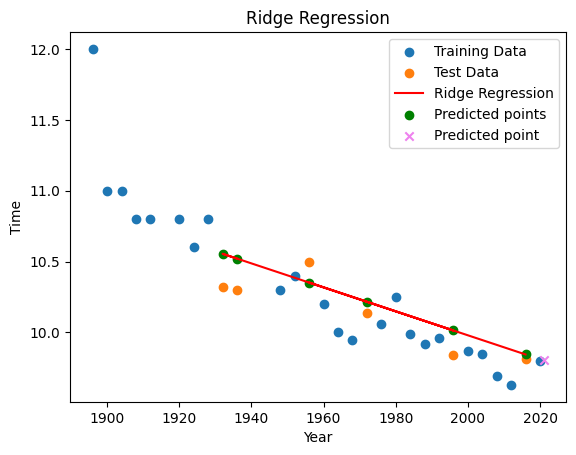

Mean Squared Error on Test Set: 0.02721707107278751


In [85]:
df = pd.read_csv('olympics_100m.csv')

print(df.head())
# Read the CSV file
df = pd.read_csv('olympics_100m.csv')

# Extract X and y columns from the DataFrame
x_values = df['Year']
y_values = df['Time']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_values.values.reshape(-1, 1), y_values, test_size=0.2, random_state=42)

# Instantiate the RidgeRegression class
ridge_reg = RidgeRegression(alpha=0.003)

# Fit the model on the training set
ridge_reg.fit(X_train, y_train)

# Predict the next year's time
next_year = df['Year'].max() + 1
predicted_time = ridge_reg.predict(X_test)
predicted_next_year = ridge_reg.predict(np.array([next_year]))

print(f'Predicted time for the next year: {predicted_next_year[0]:.2f} seconds')

# Plot the regression line
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, ridge_reg.predict(X_test), color='red', label='Ridge Regression')
plt.scatter(X_test, predicted_time, color='green', marker='o', label='Predicted points')
plt.scatter(next_year, predicted_next_year, color='violet', marker='x', label='Predicted point')



plt.xlabel('Year')
plt.ylabel('Time')
plt.title('Ridge Regression')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, predicted_time)
print(f'Mean Squared Error on Test Set: {mse}')

